In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
from scipy.stats import norm
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from tensorflow.python.keras.layers import Input, Dense, Lambda, Flatten, Reshape, Concatenate
from tensorflow.python.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, Activation, LeakyReLU
from tensorflow.python.keras.models import Model
import tensorflow.keras.backend as K
from tensorflow.python.keras import metrics
from tensorflow.python.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.optimizers import Adam

import pdb
import os

from helpers_vizualisation import eval_knn_proportions
from helpers_vizualisation import plot_tsne
from helpers_vizualisation import plot_umap

from data_loader import load_data_basic, normalize

from autoencoder_gan import GAN

In [2]:
############# DATA LOADING ############# 

In [3]:
path = os.getcwd()
path = path+'/toy_data_gamma_small.parquet' # '/toy_data_gamma_large.parquet'
x1_train, x1_test, x2_train, x2_test = load_data_basic(path, patient='sample1', batch_names = ['batch1', 'batch2'], seed=42,
                                                      n_cells_to_select=0)

In [4]:
#############    MODEL     #############

In [ ]:
gan = GAN(x1_train.shape[1])
#gan.train(x1, x2, epochs=30000, batch_size=64, sample_interval=200)
plot_model = gan.train(x1_train, x2_train, epochs=1000, batch_size=50, sample_interval=200)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               10752     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

78 [D loss: 0.581145, acc.: 77.00%] [G loss: 0.244128, mae: 0.37]
79 [D loss: 0.544079, acc.: 71.00%] [G loss: 0.214121, mae: 0.34]
80 [D loss: 0.522436, acc.: 74.00%] [G loss: 0.206895, mae: 0.33]
81 [D loss: 0.594588, acc.: 67.00%] [G loss: 0.237078, mae: 0.35]
82 [D loss: 0.469027, acc.: 75.00%] [G loss: 0.232151, mae: 0.37]
83 [D loss: 0.498427, acc.: 79.00%] [G loss: 0.221490, mae: 0.34]
84 [D loss: 0.497961, acc.: 75.00%] [G loss: 0.264602, mae: 0.37]
85 [D loss: 0.386137, acc.: 83.00%] [G loss: 0.296437, mae: 0.42]
86 [D loss: 0.750690, acc.: 60.00%] [G loss: 0.265284, mae: 0.38]
87 [D loss: 0.513645, acc.: 77.00%] [G loss: 0.249053, mae: 0.34]
88 [D loss: 0.717604, acc.: 61.00%] [G loss: 0.231776, mae: 0.35]
89 [D loss: 0.499847, acc.: 77.00%] [G loss: 0.228961, mae: 0.36]
90 [D loss: 0.477706, acc.: 81.00%] [G loss: 0.237676, mae: 0.36]
91 [D loss: 0.562971, acc.: 70.00%] [G loss: 0.193850, mae: 0.30]
92 [D loss: 0.465785, acc.: 78.00%] [G loss: 0.208948, mae: 0.32]
93 [D loss

201 [D loss: 0.608663, acc.: 64.00%] [G loss: 0.202664, mae: 0.30]
202 [D loss: 0.531913, acc.: 73.00%] [G loss: 0.175973, mae: 0.28]
203 [D loss: 0.665008, acc.: 63.00%] [G loss: 0.200994, mae: 0.31]
204 [D loss: 0.541113, acc.: 79.00%] [G loss: 0.177642, mae: 0.30]
205 [D loss: 0.506394, acc.: 76.00%] [G loss: 0.177413, mae: 0.27]
206 [D loss: 0.473214, acc.: 82.00%] [G loss: 0.200594, mae: 0.31]
207 [D loss: 0.623857, acc.: 58.00%] [G loss: 0.189753, mae: 0.28]
208 [D loss: 0.664118, acc.: 66.00%] [G loss: 0.218473, mae: 0.32]
209 [D loss: 0.687880, acc.: 60.00%] [G loss: 0.202220, mae: 0.31]
210 [D loss: 0.569047, acc.: 78.00%] [G loss: 0.194524, mae: 0.31]
211 [D loss: 0.521995, acc.: 77.00%] [G loss: 0.158626, mae: 0.28]
212 [D loss: 0.541391, acc.: 76.00%] [G loss: 0.182631, mae: 0.29]
213 [D loss: 0.533881, acc.: 71.00%] [G loss: 0.180684, mae: 0.28]
214 [D loss: 0.521827, acc.: 76.00%] [G loss: 0.193429, mae: 0.30]
215 [D loss: 0.652887, acc.: 63.00%] [G loss: 0.226066, mae: 0

324 [D loss: 0.527418, acc.: 78.00%] [G loss: 0.136787, mae: 0.24]
325 [D loss: 0.451539, acc.: 75.00%] [G loss: 0.132504, mae: 0.24]
326 [D loss: 0.576783, acc.: 71.00%] [G loss: 0.133734, mae: 0.24]
327 [D loss: 0.477887, acc.: 84.00%] [G loss: 0.129718, mae: 0.24]
328 [D loss: 0.519496, acc.: 81.00%] [G loss: 0.130678, mae: 0.24]
329 [D loss: 0.553845, acc.: 69.00%] [G loss: 0.168272, mae: 0.28]
330 [D loss: 0.539538, acc.: 76.00%] [G loss: 0.163497, mae: 0.27]
331 [D loss: 0.647908, acc.: 57.00%] [G loss: 0.172636, mae: 0.28]
332 [D loss: 0.666203, acc.: 69.00%] [G loss: 0.164336, mae: 0.27]
333 [D loss: 0.671360, acc.: 61.00%] [G loss: 0.144139, mae: 0.25]
334 [D loss: 0.561455, acc.: 76.00%] [G loss: 0.135180, mae: 0.23]
335 [D loss: 0.514527, acc.: 74.00%] [G loss: 0.182174, mae: 0.31]
336 [D loss: 0.574734, acc.: 71.00%] [G loss: 0.149403, mae: 0.27]
337 [D loss: 0.557982, acc.: 76.00%] [G loss: 0.130883, mae: 0.24]
338 [D loss: 0.480797, acc.: 82.00%] [G loss: 0.132624, mae: 0

In [ ]:
############# VISUALIZATIONS ############# 

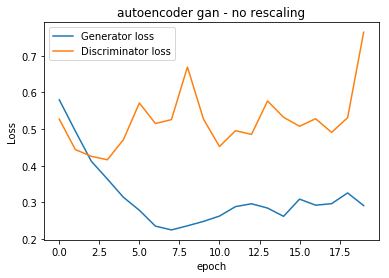

In [7]:
save = 0
plot_dir = '/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/plots_gans'
plt.plot(plot_model["epoch"], plot_model["g_loss"], label = 'Generator loss')
plt.plot(plot_model["epoch"], plot_model["d_loss"], label = 'Discriminator loss')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Loss")
mytitle = "autoencoder gan - no rescaling"
plt.title(mytitle)
if save:
    plt.savefig(os.path.join(plot_dir, mytitle.replace(' ', '_') + '.pdf'), bbox_anchor = 'tight')

In [ ]:
x1_train_transformed = gan.transform_batch(x1_train)

In [ ]:
f = 5
plt.figure()
plt.hist(x2_train.values[:, f])
plt.figure()
plt.hist(x1_train.values[:, f])
plt.figure()
plt.hist(x1_train_transformed.values[:, f])

In [ ]:
x_train = pd.concat([x1_train, x1_train_transformed])
plot_tsne(x_train, do_pca=True, n_plots=2, iter_=500, pca_components=20)

x_train = pd.concat([x1_train, x2_train])
plot_tsne(x_train, do_pca=True, n_plots=2, iter_=500, pca_components=20)

x_train = pd.concat([x1_train_transformed, x2_train])
plot_tsne(x_train, do_pca=True, n_plots=2, iter_=500, pca_components=20)

In [ ]:
plot_umap(pd.concat([x1_train, x2_train]))
plot_umap(pd.concat([x1_train_transformed, x2_train]))

In [ ]:
#eval_knn_proportions(x1_test)